First few rows of the raw dataset:
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Sy

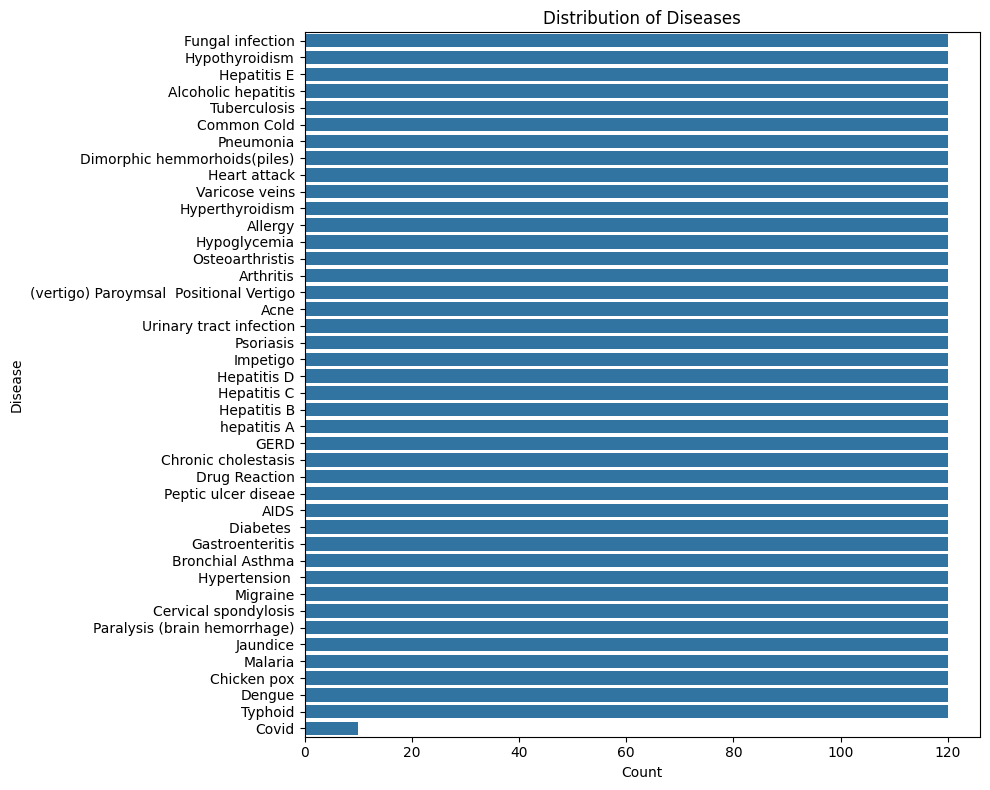

In [1]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Dataset

# Load the dataset
try:
    df = pd.read_csv('../datasets/General_Disease_Dataset.csv')
except FileNotFoundError:
    print("Error: 'General_Disease_Dataset.csv' not found. Make sure the file is in the current directory or provide the correct path.")
    exit()

# 3. Data Cleaning, Formatting & Visualization

print("First few rows of the raw dataset:")
print(df.head())
print("\nRaw Dataset Info:")
df.info()

# Check for missing values in general (before focusing on symptoms)
# Pandas reads empty fields in CSV as NaN by default
print("\nMissing values per column in raw dataset:")
print(df.isnull().sum()) # df.isna() is an alias for df.isnull()

# Identify symptom columns (Symptom_1 to Symptom_17)
symptom_cols = [col for col in df.columns if 'Symptom_' in col]

# Clean symptom columns:
# 1. Convert to string type to handle potential mixed types or numbers.
# 2. Strip leading/trailing whitespace from symptom names.
# 3. Replace empty strings or 'nan' (string literal) with np.nan for consistent NaN handling.
print("\nCleaning symptom data...")
for col in symptom_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace(['nan', ''], np.nan) # 'nan' might appear if a NaN was converted to string

# Encode the target variable 'Disease'
print("\nEncoding target variable 'Disease'...")
label_encoder = LabelEncoder()
df['Disease_encoded'] = label_encoder.fit_transform(df['Disease'])
y = df['Disease_encoded']
print(f"Number of unique diseases: {len(label_encoder.classes_)}")
# print(f"Disease classes mapped: {dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))}")


# Create feature matrix X from symptoms (binary encoding)
print("\nCreating feature matrix X (binary symptom encoding)...")
# First, get a set of all unique symptoms present in the dataset
all_symptoms_set = set()
for col in symptom_cols:
    all_symptoms_set.update(df[col].dropna().unique())

unique_symptoms_list = sorted(list(all_symptoms_set))

if not unique_symptoms_list:
    print("Error: No valid symptoms found after cleaning. Cannot proceed.")
    exit()

print(f"Number of unique symptoms found: {len(unique_symptoms_list)}")

# Initialize the feature DataFrame X with zeros
X_df = pd.DataFrame(0, index=df.index, columns=unique_symptoms_list)

# Populate X_df: 1 if symptom is present for a patient, 0 otherwise
for i, row in df.iterrows():
    # Collect all valid symptoms for the current row
    current_row_symptoms = set()
    for col_name in symptom_cols:
        symptom = row[col_name]
        if pd.notna(symptom) and symptom in X_df.columns: # Ensure symptom is a known feature
            current_row_symptoms.add(symptom)

    for s_present in current_row_symptoms:
        X_df.loc[i, s_present] = 1

X = X_df
print("\nShape of feature matrix X:", X.shape)
print("First few rows of feature matrix X:")
print(X.head())
print(f"Missing values in X: {X.isnull().sum().sum()}") # Should be 0


# Data Visualization
# Distribution of Diseases
plt.figure(figsize=(10, 8)) # Adjusted for potentially many diseases
sns.countplot(y=df['Disease'], order = df['Disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

# Optional: Visualize top N symptom frequencies
# symptom_frequencies = X.sum().sort_values(ascending=False)
# plt.figure(figsize=(12, 8))
# symptom_frequencies.head(30).plot(kind='bar') # Show top 30
# plt.title('Top 30 Most Common Symptoms')
# plt.ylabel('Frequency')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()



Splitting data into training and testing sets...
X_train shape: (3944, 133), y_train shape: (3944,)
X_test shape: (986, 133), y_test shape: (986,)

Defining ML models...

Training models and evaluating performance...
Training Logistic Regression...
Logistic Regression - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Training Random Forest...
Random Forest - Accuracy: 0.9980, Precision: 0.9960, Recall: 0.9980, F1-Score: 0.9970
Training Decision Tree...
Decision Tree - Accuracy: 0.2677, Precision: 0.2442, Recall: 0.2677, F1-Score: 0.2449
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Training Support Vector Machine...
Support Vector Machine - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000
Training AdaBoost...
AdaBoost - Accuracy: 0.0974, Precision: 0.0737, Recall: 0.0974, F1-Score: 0.0743
Training Gradient Boosting...
Gradient Boosting - Accuracy: 1.0000, Precision:

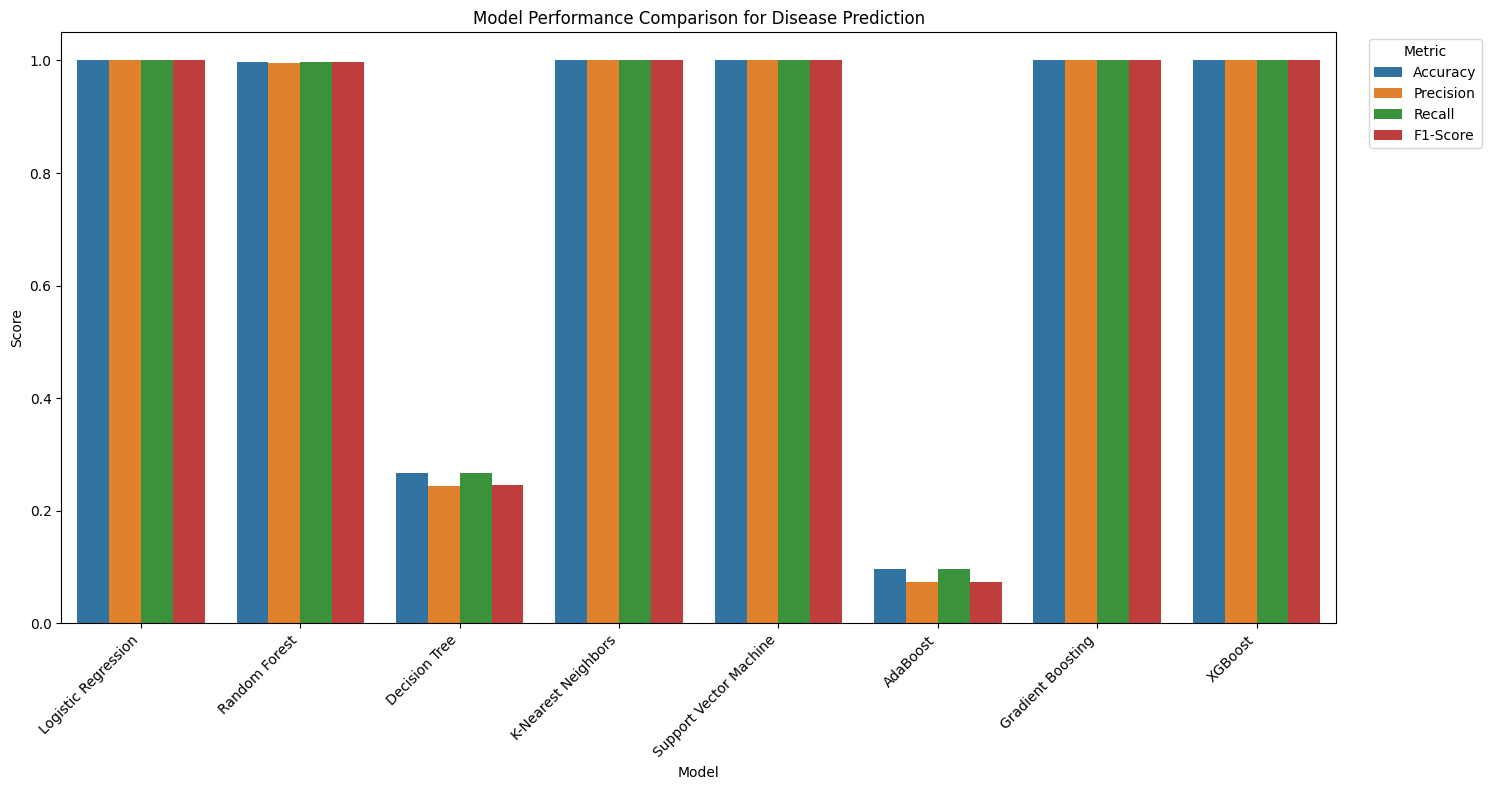


Script finished.


In [2]:
# 4. Data Splitting

print("\nSplitting data into training and testing sets...")
# Stratify by y to ensure proportional representation of diseases in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# 5. Defining ML models

print("\nDefining ML models...")
# Define the models with specified parameters
# For multiclass, ensure models and metrics are appropriate
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=300, random_state=42)), # Increased max_iter
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, criterion='gini', random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)), # n_neighbors can be tuned based on dataset size/complexity
    ('Support Vector Machine', SVC(kernel='linear', C=0.1, probability=True, random_state=42)), # Added C and probability=True for SVC
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
]

# 6. Training models

print("\nTraining models and evaluating performance...")
model_metrics = []

for name, model in models:
    print(f"Training {name}...")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        # Use 'weighted' average for multiclass precision, recall, f1, suitable for imbalanced classes
        # zero_division=0 handles cases where a class might not have predictions
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        model_metrics.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
        print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    except Exception as e:
        print(f"Error training or evaluating {name}: {e}")
        model_metrics.append({
            'Model': name,
            'Accuracy': np.nan,
            'Precision': np.nan,
            'Recall': np.nan,
            'F1-Score': np.nan
        })


# 7. Evaluating model performance

# Create a DataFrame for all metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics DataFrame, sorted by Accuracy
print("\nModel Performance Metrics:")
print(metrics_df.sort_values(by='Accuracy', ascending=False))

# Visualize the metrics
plt.figure(figsize=(15, 8)) # Adjusted figure size for better readability
melted_metrics = pd.melt(metrics_df, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                         var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_metrics)
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right
plt.title('Model Performance Comparison for Disease Prediction')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left') # Move legend outside plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nScript finished.")


In [4]:
#---------------------------------------------------
# XGBoost has highest recall.
# Extracting the XGBoost

from joblib import dump

# Define the SVM model
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Save the model to a file
dump(xgb_model, '../models/general_disease_prediction_xgb.sav')

['../models/general_disease_prediction_xgb.sav']

In [4]:
# --- START: COMMANDS TO VIEW REFINED DATASET BEFORE TRAINING ---
print("\n--- Refined Dataset Before Training ---")

print("\nFirst 5 rows of X_train (Features for Training):")
print(X_train.head())

print(f"\nShape of X_train: {X_train.shape}")

print("\nFirst 5 values of y_train (Encoded Target for Training):")
print(y_train.head())


--- Refined Dataset Before Training ---

First 5 rows of X_train (Features for Training):
      abdominal_pain  abnormal_menstruation  acidity  acute_liver_failure  \
2822               0                      0        0                    0   
4615               1                      0        0                    1   
3383               0                      0        0                    0   
4169               0                      0        0                    0   
4426               0                      0        0                    0   

      altered_sensorium  anxiety  back_pain  belly_pain  blackheads  \
2822                  0        0          0           0           0   
4615                  0        0          0           0           0   
3383                  0        0          0           0           0   
4169                  0        0          0           0           0   
4426                  0        0          0           0           0   

      bladder_disco